In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from numpy import nan as NA
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [3]:
#first choose a dataset

df = pd.read_csv('/Users/cappsjr/Downloads/HR_comma_sep.csv')

df = df.rename(columns={'sales': 'Department'})

df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object') 

There are 10 variables.

There are 14999 number of datapoints in this for each variable.

Satisfaction Level: 	Continuous
Last Evaluation: 	Continuous
Number of Projects Completed: 	Continuous
Average Monthly Hours: 	Continuous
Year With the Company: 	Continuous
Work Accident: 	Categorical
Left: 	Categorical
Promotion in the Last 5 Years: 	 Categorical
Department: 	 Categorical



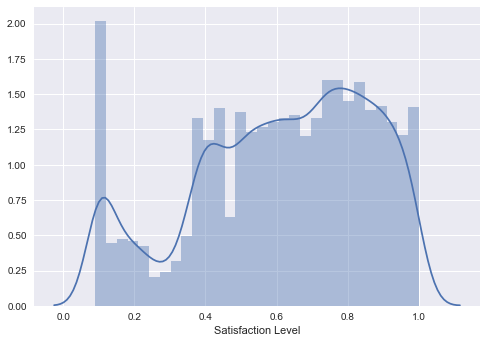

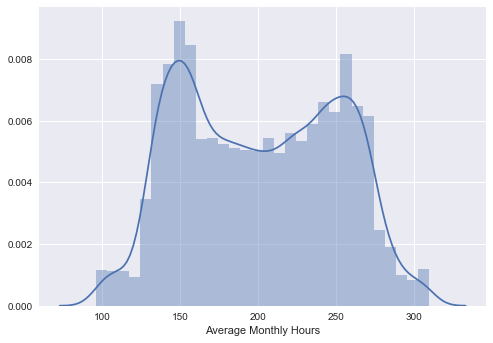

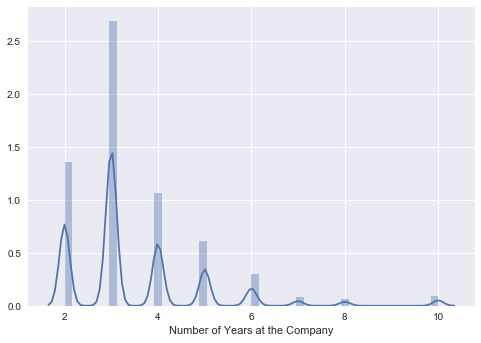

Mean
Satisfaction Level:  0.6128335222348166
Average Monthly Hours:  201.0503366891126
Years at the Company:  3.498233215547703


Median
Satisfaction Level:  0.64
Average Monthly Hours:  200.0
Years at the Company:  3.0


Variance
Satisfaction Level:  0.061817200647087255
Average Monthly Hours:  2494.313174809979
Years at the Company:  2.1319978117222864


In [4]:
#Exploring the data using the univariate methods learned

#How many variables do I have?
print(df.columns, '\n')
print('There are 10 variables.\n')

#How many datapoints are there?
print('There are', len(df), 'number of datapoints in this for each variable.\n')

#Which variables are continuous and which are categorical?
print('Satisfaction Level: \tContinuous')
print('Last Evaluation: \tContinuous')
print('Number of Projects Completed: \tContinuous')
print('Average Monthly Hours: \tContinuous')
print('Year With the Company: \tContinuous')
print('Work Accident: \tCategorical')
print('Left: \tCategorical')
print('Promotion in the Last 5 Years: \t Categorical')
print('Department: \t Categorical\n')

#Do any of my variables have a known probability distribution?

sns.distplot(df['satisfaction_level']) #histogram of satisfaction level
plt.xlabel('Satisfaction Level')
plt.show()

sns.distplot(df['average_montly_hours']) #histogram of average monthly hours
plt.xlabel('Average Monthly Hours')
plt.show()

sns.distplot(df['time_spend_company']) #histogram of years spent at the company
plt.xlabel('Number of Years at the Company')
plt.show()

#Is there missing data?  If so how much?

#Mean of the variables
print('Mean')
print('Satisfaction Level: ', df['satisfaction_level'].mean())

print('Average Monthly Hours: ', df['average_montly_hours'].mean())

print('Years at the Company: ', df['time_spend_company'].mean())

print('\n')

#Median of the variables
print('Median')
print('Satisfaction Level: ', df['satisfaction_level'].median())

print('Average Monthly Hours: ', df['average_montly_hours'].median())

print('Years at the Company: ', df['time_spend_company'].median())

print('\n')

#How much variance (the average of the squared differences from the mean) is there in each of my variables?
print('Variance')
print('Satisfaction Level: ', df['satisfaction_level'].var())

print('Average Monthly Hours: ', df['average_montly_hours'].var())

print('Years at the Company: ', df['time_spend_company'].var())

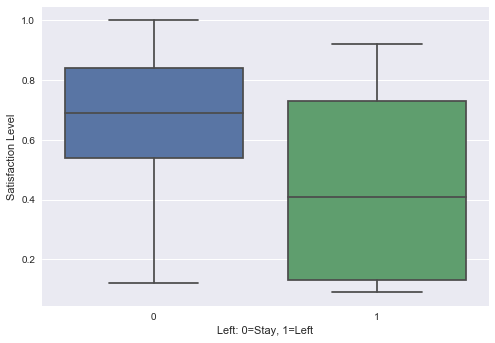

Median Satisfaction Level:  
 left
0    0.69
1    0.41
Name: satisfaction_level, dtype: float64


Mean Satisfaction Level:  
 left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64


Standard Deviation Satisfaction Level:  
 left
0    0.217104
1    0.263933
Name: satisfaction_level, dtype: float64


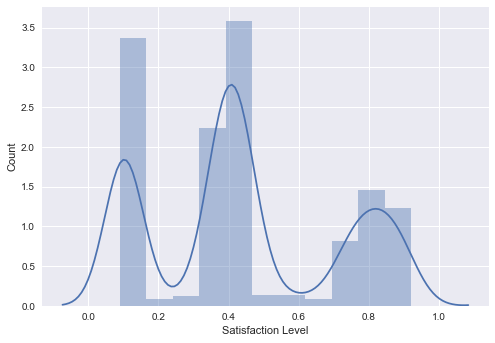

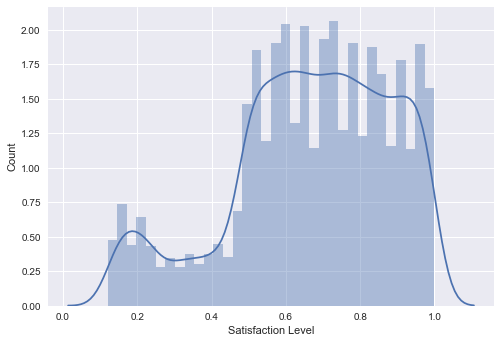

In [5]:
#Examine the data using the bivariate methods learned

#Looking at the relationship between satisfaction level and whether or not the employee stayed at the company
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.xlabel('Left: 0=Stay, 1=Left')
plt.ylabel('Satisfaction Level')
plt.show()

print('Median Satisfaction Level: ', '\n', df.groupby('left')['satisfaction_level'].median())

print('\n')

print('Mean Satisfaction Level: ', '\n', df.groupby('left')['satisfaction_level'].mean())

print('\n')

print('Standard Deviation Satisfaction Level: ', '\n', df.groupby('left')['satisfaction_level'].std())

#create new dataframes that isolate whether those employees stayed with the company or left the company
df_left = df[(df['left']==1)]
df_stay = df[(df['left']==0)]

#histogram of satisfaction levels for employees who left
sns.distplot(df_left['satisfaction_level'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()

#histogram of satisfaction levels for employees who stay
sns.distplot(df_stay['satisfaction_level'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()

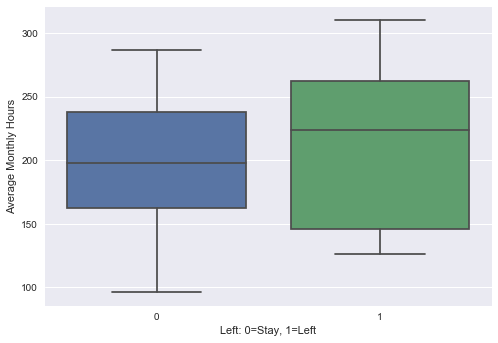

Median Average Monthly Hours:  
 left
0    198
1    224
Name: average_montly_hours, dtype: int64


Mean Average Monthly Hours:  
 left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64


Standard Deviation Average Monthly Hours:  
 left
0    45.682731
1    61.202825
Name: average_montly_hours, dtype: float64


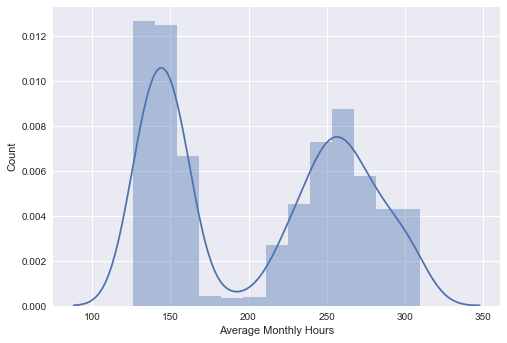

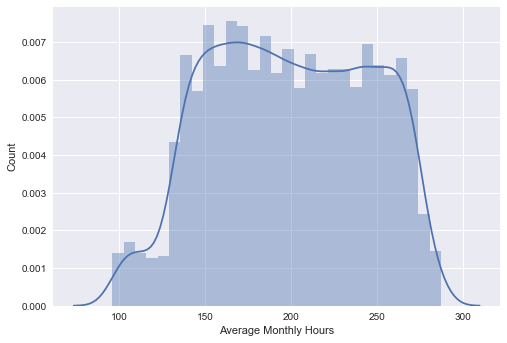

In [6]:
#Looking at the relationship between average monthly hours and whether or not the employee stayed at the company
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.xlabel('Left: 0=Stay, 1=Left')
plt.ylabel('Average Monthly Hours')
plt.show()

print('Median Average Monthly Hours: ', '\n', df.groupby('left')['average_montly_hours'].median())

print('\n')

print('Mean Average Monthly Hours: ', '\n', df.groupby('left')['average_montly_hours'].mean())

print('\n')

print('Standard Deviation Average Monthly Hours: ', '\n', df.groupby('left')['average_montly_hours'].std())

#histogram of average monthly hours for employees who left
sns.distplot(df_left['average_montly_hours'])
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')
plt.show()

#histogram of average monthly hours for employees who stay
sns.distplot(df_stay['average_montly_hours'])
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')
plt.show()

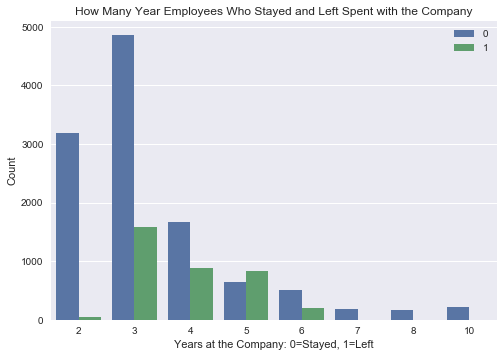

In [7]:
sns.countplot(x='time_spend_company', data=df, hue='left')
plt.xlabel('Years at the Company: 0=Stayed, 1=Left')
plt.ylabel('Count')
plt.title('How Many Year Employees Who Stayed and Left Spent with the Company')
plt.legend(loc='upper right')
plt.show()

In [8]:
df_left.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.182295,-0.227113,-0.084117,0.446440,0.005864,NaN,0.005516
last_evaluation,0.182295,1.000000,0.804155,0.830336,0.783873,-0.001875,NaN,-0.047992
number_project,-0.227113,0.804155,1.000000,0.875194,0.601989,-0.008401,NaN,-0.032301
average_montly_hours,-0.084117,0.830336,0.875194,1.000000,0.664011,-0.009048,NaN,-0.035475
time_spend_company,0.446440,0.783873,0.601989,0.664011,1.000000,0.005222,NaN,-0.045888
Work_accident,0.005864,-0.001875,-0.008401,-0.009048,0.005222,1.000000,NaN,0.056214
left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promotion_last_5years,0.005516,-0.047992,-0.032301,-0.035475,-0.045888,0.056214,NaN,1.000000


In [9]:
df_stay.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.086357,-0.092799,0.055354,-0.168791,-0.003128,NaN,0.001228
last_evaluation,0.086357,1.000000,0.040306,0.090304,-0.017682,-0.007416,NaN,-0.002034
number_project,-0.092799,0.040306,1.000000,0.070289,0.079943,0.001098,NaN,0.001676
average_montly_hours,0.055354,0.090304,0.070289,1.000000,-0.016444,0.003285,NaN,0.007871
time_spend_company,-0.168791,-0.017682,0.079943,-0.016444,1.000000,0.027261,NaN,0.088629
Work_accident,-0.003128,-0.007416,0.001098,0.003285,0.027261,1.000000,NaN,0.028084
left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promotion_last_5years,0.001228,-0.002034,0.001676,0.007871,0.088629,0.028084,NaN,1.000000


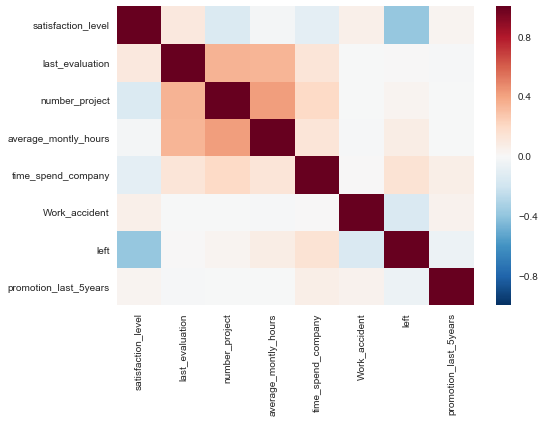

In [10]:
sns.heatmap(df.corr())
plt.show()

In [11]:
#create 10 new features -- feature engineering

#create 3 new features by converting the categorical variable of salary level into 3 binary variables, high, medium, 
#and low
df_salary = pd.get_dummies(df['salary'])

#creating new features by converting the categorical variable of sales into binary variables

df_department = pd.get_dummies(df['Department'])

df_new = df.join((df_department, df_salary))

#creating a new feature called unsatisfied--I used 0.45 as the metric for determining "unsatisfaction" because the 
#mean satisfaction level for employees who left was 0.44 and the median was 0.41
df_new['Unsatisfied'] = np.where(df_new['satisfaction_level']<0.45, 1, 0) 

#creating a new 'overworked feature for employees who work more than 224 average monthly hours.  I chose the 
#224 hour measurement because that is the median average monthly hours worked by employees who left the company

df_new['Overworked'] = np.where(df_new['average_montly_hours']>224, 1, 0) 

df_new.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,marketing,product_mng,sales,support,technical,high,low,medium,Unsatisfied,Overworked
14994,0.40,0.57,2,151,3,0,1,0,support,low,...,0,0,0,1,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,...,0,0,0,1,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,...,0,0,0,1,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,...,0,0,0,1,0,0,1,0,1,1
14998,0.37,0.52,2,158,3,0,1,0,support,low,...,0,0,0,1,0,0,1,0,1,0


In [12]:
df_new = df_new.rename(columns={'high': 'High Salary', 
                         'medium': 'Medium Salary', 
                         'low': 'Low Salary'})
df_new.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,marketing,product_mng,sales,support,technical,High Salary,Low Salary,Medium Salary,Unsatisfied,Overworked
14994,0.40,0.57,2,151,3,0,1,0,support,low,...,0,0,0,1,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,...,0,0,0,1,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,...,0,0,0,1,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,...,0,0,0,1,0,0,1,0,1,1
14998,0.37,0.52,2,158,3,0,1,0,support,low,...,0,0,0,1,0,0,1,0,1,0


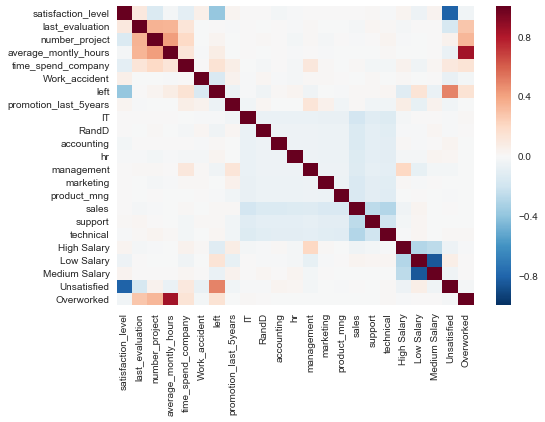

In [13]:
sns.heatmap(df_new.corr())
plt.show()

In [14]:
df_new.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,...,marketing,product_mng,sales,support,technical,High Salary,Low Salary,Medium Salary,Unsatisfied,Overworked
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.081805,0.052470,...,0.057204,0.060137,0.276018,0.148610,0.181345,0.082472,0.487766,0.429762,0.259017,0.373158
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.274077,0.222981,...,0.232239,0.237749,0.447041,0.355715,0.385317,0.275092,0.499867,0.495059,0.438110,0.483660
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_new1 = df_new.loc[ : , ['satisfaction_level', 
                           'average_montly_hours', 
                           'time_spend_company',
                          'left',
                          'promotion_last_5years',
                          'High Salary',
                          'Medium Salary',
                          'Low Salary',
                          'Unsatisfied',
                          'Overworked']]
df_new1.tail()

,satisfaction_level,average_montly_hours,time_spend_company,left,promotion_last_5years,High Salary,Medium Salary,Low Salary,Unsatisfied,Overworked
14994,0.40,151,3,1,0,0,0,1,1,0
14995,0.37,160,3,1,0,0,0,1,1,0
14996,0.37,143,3,1,0,0,0,1,1,0
14997,0.11,280,4,1,0,0,0,1,1,1
14998,0.37,158,3,1,0,0,0,1,1,0


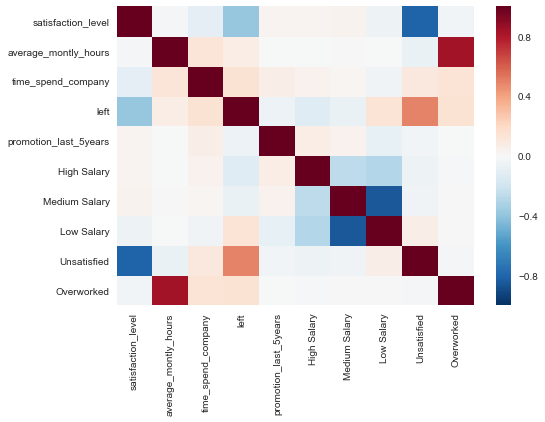

In [16]:
sns.heatmap(df_new1.corr())
plt.show()

In [17]:
# Standardize the data
X = df_new1.drop(df_new1['left'])

X_std = StandardScaler().fit_transform(X)

In [18]:
# run an eigendecomposition to find eigenvectors and eigenvalues
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues: \n%s' %eig_vals)
print('Eigenvectors: \n%s' %eig_vecs)

Eigenvalues: 
[  2.26978409e+00   1.79225955e+00   1.89683521e+00   1.20618799e+00
   9.83530943e-01   8.91334102e-01   6.28018175e-01   1.81775532e-01
   1.50941243e-01  -9.60420776e-16]
Eigenvectors: 
[[ -5.31091667e-01   2.70611399e-01   3.86422937e-02   9.49862240e-02
   -1.07265526e-01  -1.68937291e-01   4.00317913e-01   6.23881901e-01
    2.11345080e-01   1.09926702e-16]
 [  1.28019804e-01   2.80855186e-01   6.15787745e-01   2.57103647e-02
    8.50777718e-02   1.18678191e-01  -1.00425232e-01  -1.74228677e-01
    6.80523419e-01   4.66826739e-16]
 [  1.52362986e-01  -4.74773444e-02   1.94581581e-01  -2.78012824e-01
   -4.69280479e-01  -7.80254018e-01  -1.74148921e-01   2.06659075e-03
   -5.06783016e-03   3.22337720e-17]
 [  4.71397117e-01  -9.62184785e-02   3.39433932e-02   7.79764255e-02
   -5.46474506e-02  -7.93972928e-02   8.52538829e-01  -1.56909306e-01
    2.36860080e-02   1.16206331e-16]
 [ -7.27004395e-02  -6.53076715e-02   5.77708464e-02  -3.90700577e-01
   -7.18537983e-01 

In [19]:
# Sort the eigenpairs

#Make a list of (eig_val, eig_vec) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

# Sort the pairs by eig_vals in descending order
eig_pairs.sort(key=lambda x: x[0], reverse=True)

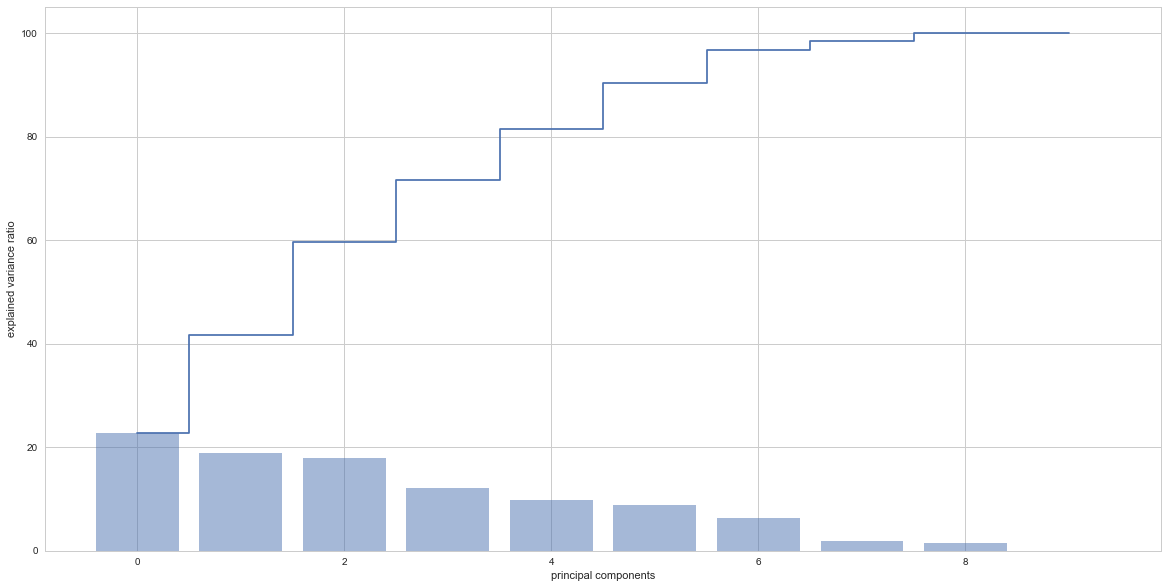

In [20]:
# Explained variance
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20,10))
    plt.bar(range(10), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(10), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('explained variance ratio')
    plt.xlabel('principal components')
    plt.show()

In [21]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

In [24]:
data = pd.DataFrame()

for i in range(0, 5, 1):
    data[i] = Y_sklearn[i]

In [25]:
# After creating different features, I used an eigendecomposition and explained variance to evaluate the 
# usefulness of each of the components.  It seem that the top 5 components explain more than 80% of the 
# variance in the data.  